# 3.

In [1]:
import scipy.io as scipy
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.linalg as lg
from make_cloud import *
from boosteval import *
from weakeval import *
from weaklearn import *
from boostlearn import *

## 3.1

In [2]:
## adaBOOST model LEARNer
#  Uses the AdaBoost algorithm to train a classifier on data.""
# Inputs
#  X - N x D : Observations
#  t - N x 1 : class labels
#  M - The number of weak learners to include in the ensemble.
# Outputs
#  params - A matrix containing the parameters for the M weak learners.
#  alpha - A vector of weights used to combine the results of the
#    M weak learners.

def boostlearn(X, t, M):
    weights = np.zeros((M + 1, len(t)))
    weights[0, ] = np.repeat(1/np.size(t), np.size(t))
    params = np.zeros((M, np.shape(X)[0] + 1))
    corect = np.zeros(M)
    for i in range(0,M): #changed he range from 1 to 0
        params[i,] = weaklearn(X = X, t = t, v = weights[i, ])
        preds = weakeval(X = X, params = params[i,:])
        pred_correct = (preds == t)
        frac_pred_correct = np.sum(pred_correct) / len(pred_correct)
        if frac_pred_correct > 0.5:
            epsilon = np.sum(weights[i, pred_correct]) / np.sum(weights[i,]) #the np sum of weights[1,] was all zeroes 
            alpha = np.log((1 - epsilon) / epsilon)
            weights[i + 1, pred_correct] = weights[i, pred_correct] * (np.exp(alpha))
            corect[i] = frac_pred_correct
        if frac_pred_correct < 0.5:            
            preds = weakeval(X = X, params = -1*params[i,:])
            pred_correct = (preds == t)
            frac_pred_correct = np.sum(pred_correct) / len(pred_correct)
        
            epsilon = np.sum(weights[i, pred_correct]) / np.sum(weights[i,]) #the np sum of weights[1,] was all zeroes 
            alpha = np.log((1 - epsilon) / epsilon)
            weights[i + 1, pred_correct] = weights[i, pred_correct] * (np.exp(alpha))
            corect[i] = frac_pred_correct
            #params[i,] = params[i,]*-1
    weights = weights[0:M,]
    return params, weights, corect



## 3.2

In [3]:
# adaBOOST model EVALuator
#  Uses a trained AdaBoost algorithm to classify data.
# Inputs
#  X - Matrix with observations (in columns) to classify.
#  params - Output of boostlearn.m (weak learner parameters).
#  alpha - Output of boostlearn.m (weak learner mixing coefficients).
# Outputs
#  C - A matrix with predicted class labels (-1 or 1) for the input
#    observations in X.

def boosteval(X, params, alpha):
    
    preds = np.empty((params.shape[0], X.shape[1]))
                
    for i in range(params.shape[0]):
        preds[i, :] = weakeval(X, params[i,]) * alpha[i, ]
    
    committee_vote = np.sign(np.sum(preds, axis = 0))

    return(committee_vote)


## 3.3

In [4]:
temp = make_cloud()
dat = pd.DataFrame(np.transpose(temp[0]), columns = ("X0", "X1"))
dat['t'] = temp[1]

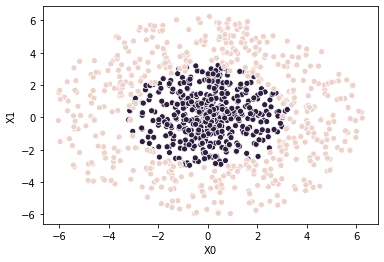

In [5]:
sns.scatterplot(x="X0", y="X1", hue="t",data=dat, legend = False)

## 3.4

In [6]:
weak_params = weaklearn(temp[0], temp[1], v = None)
dat['t_weak_pred'] = weakeval(temp[0], weak_params)
dat['correct_class'] = dat['t'] == dat['t_weak_pred']

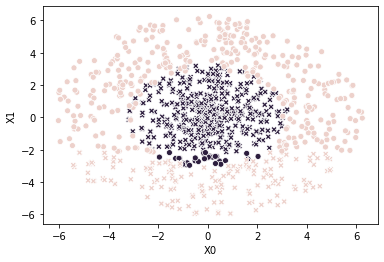

In [7]:
sns.scatterplot(x="X0", y="X1", hue="t", style = "correct_class", data=dat, legend = False)

We can see the weak learner classifies according to a horizontal decision boundary. X's are points that are classified correctly, thus the majority of the points within the smaller circle are classified correctly, while a minority of the points in the larger circle are classified correctly. 

## 3. 5

In [8]:
temp_boostlearn = boostlearn(X = temp[0], t = temp[1], M = 5)

dat['t_boost_5'] = boosteval(X = temp[0], 
                             params = temp_boostlearn[0], 
                             alpha = temp_boostlearn[1])
dat['correct_class_boost_5'] = dat['t'] == dat['t_boost_5']

/Users/dancrowley/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
/Users/dancrowley/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


sns.scatterplot(x="X0", y="X1", hue="t", style = "correct_class_boost_5", data=dat, legend = False)

Strangely, the predictions appear to be identical to that of weak learn. This must be due a bug in transfering over the boost_learn function from matlab to python. I will come back to this if I have time.. 

## 3.6

M = 10:

/Users/dancrowley/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
/Users/dancrowley/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


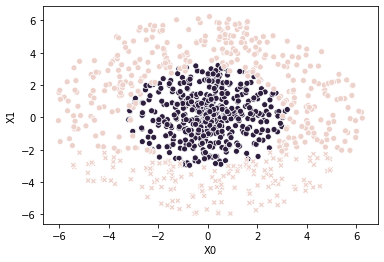

In [9]:
temp_boostlearn = boostlearn(X = temp[0], t = temp[1], M = 10)

dat['t_boost_10'] = boosteval(X = temp[0], 
                             params = temp_boostlearn[0], 
                             alpha = temp_boostlearn[1])
dat['correct_class_boost_10'] = dat['t'] == dat['t_boost_10']

sns.scatterplot(x="X0", y="X1", hue="t", style = "correct_class_boost_10", data=dat, legend = False)

M = 50:

/Users/dancrowley/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
/Users/dancrowley/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


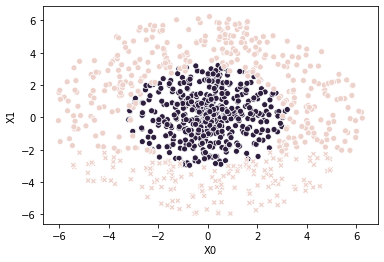

In [10]:
temp_boostlearn = boostlearn(X = temp[0], t = temp[1], M = 50)

dat['t_boost_50'] = boosteval(X = temp[0], 
                             params = temp_boostlearn[0], 
                             alpha = temp_boostlearn[1])

dat['correct_class_boost_50'] = dat['t'] == dat['t_boost_50']

sns.scatterplot(x="X0", y="X1", hue="t", style = "correct_class_boost_50", data=dat, legend = False)

M = 100:

/Users/dancrowley/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
/Users/dancrowley/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


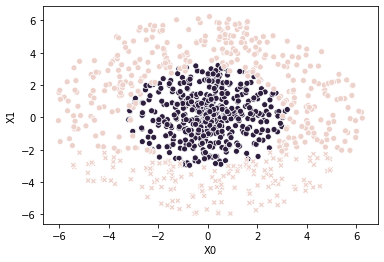

In [11]:
temp_boostlearn = boostlearn(X = temp[0], t = temp[1], M = 100)

dat['t_boost_100'] = boosteval(X = temp[0], 
                             params = temp_boostlearn[0], 
                             alpha = temp_boostlearn[1])
dat['correct_class_boost_100'] = dat['t'] == dat['t_boost_100']

sns.scatterplot(x="X0", y="X1", hue="t", style = "correct_class_boost_100", data=dat, legend = False)

Again, due to the bug in the boost_learn code, the predictions are not changing with M. I would expect to see a gradually decreasing missclassification rate. When the points along the border between the two circles (and overlapping the border) begin to be classified correctly, I would assume that overfitting is ocurring. 

# 3.7

In [12]:
new_temp = make_cloud()
new_dat = pd.DataFrame(np.transpose(new_temp[0]), columns = ("X0", "X1"))
new_dat['t'] = new_temp[1]

missclass_rate = np.empty((2, 100))

for i in range(100):
    M = i + 1
    temp_boostlearn = boostlearn(X = temp[0], t = temp[1], M = M)
    temp_boosteval = boosteval(X = new_temp[0], 
                               params = temp_boostlearn[0], 
                               alpha = temp_boostlearn[1])
    missclass_rate[0, i] = M
    missclass_rate[1, i] = sum(new_dat['t'] != temp_boosteval) / temp_boosteval.shape[0]
    

/Users/dancrowley/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
/Users/dancrowley/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars


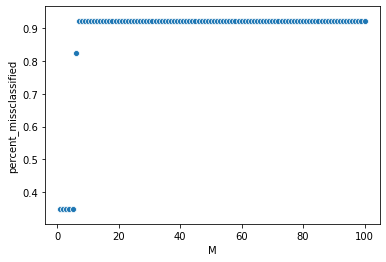

In [13]:
dat = pd.DataFrame(np.transpose(missclass_rate), 
                   columns = ("M", "percent_missclassified"))

sns.scatterplot(x="M", y="percent_missclassified", data=dat, legend = False)

Again, the bug is not resolved. The missclassification rate is a constant 0.3560. 